In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# for OLS method
import statsmodels.api as sm
#the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

In [4]:
# Load the data from a .csv 
data = pd.read_csv(r'C:\Users\nijat\Desktop\PYTHON - KURS\Projects\USA housing linear regrerssion\USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
data = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
    data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [9]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

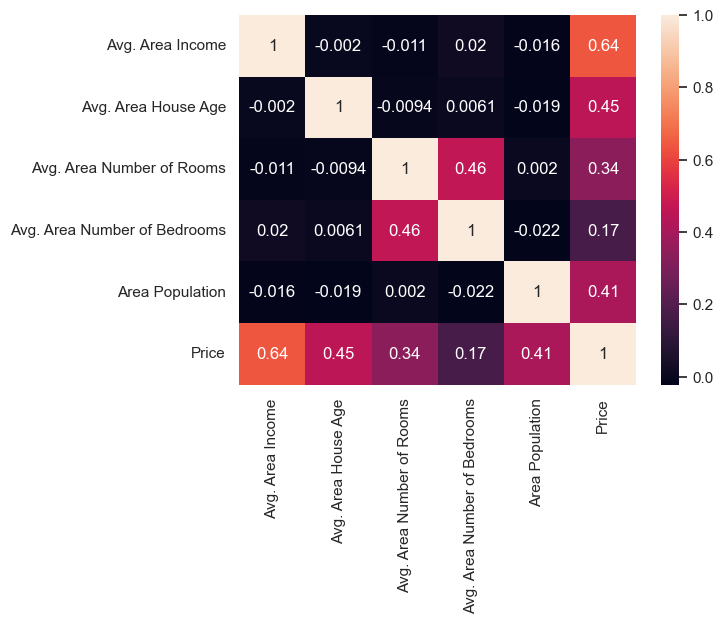

In [10]:
sns.heatmap(data.corr(), annot=True)

In [11]:
data = data[['Avg. Area Income', 'Price']]
data

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


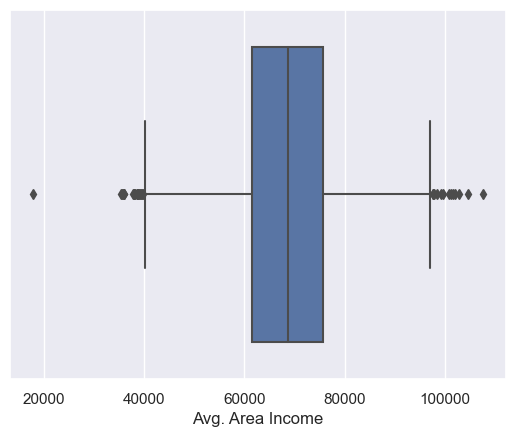

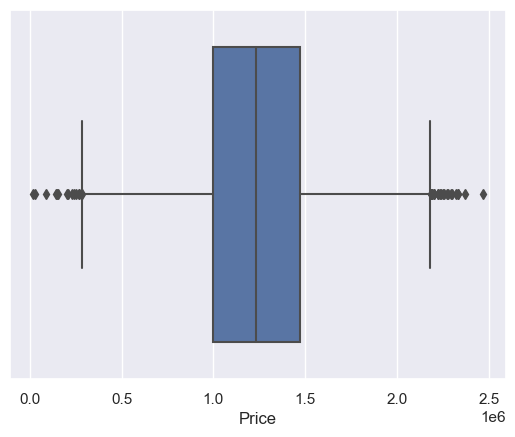

In [12]:
for i in data.columns:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [13]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

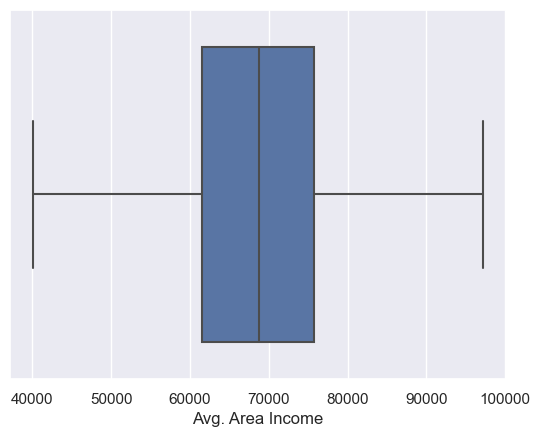

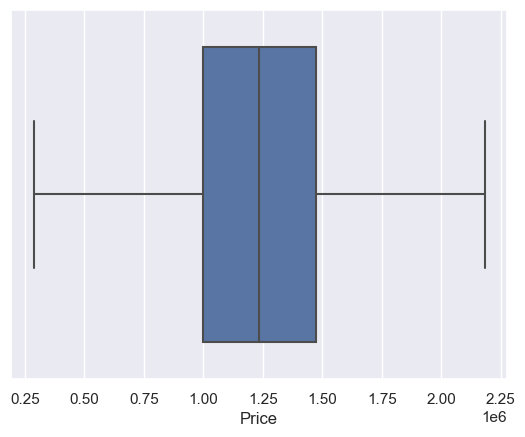

In [14]:
for i in data.columns:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [15]:
# x musteqil
x = data[['Avg. Area Income']]
# y asili
y = data['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [17]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
reg.coef_

array([21.22758637])

In [19]:
reg.intercept_

-226430.8280571024

In [20]:
y_pred = reg.predict(X_test)

In [21]:
y_pred

array([1087717.95679786,  986942.30213622, 1263550.36603739,
       1244997.46496339, 1323002.15311019, 1442778.64164739,
        907515.74416824, 1044399.97511108,  872052.51140497,
       1465189.65804673, 1044374.94683884, 1186789.57856782,
        859249.21092023, 1262271.70497091, 1152469.16474319,
        995603.47171554, 1117797.19777008, 1128703.06504167,
       1000838.80541775, 1226138.82175302, 1243302.17551164,
        995956.44804061, 1391636.15552518, 1294959.80784285,
       1390841.09659941, 1134577.22589171,  895239.31822655,
       1135548.43418173, 1389373.57695626, 1443931.71213045,
       1360478.41419317, 1484451.32407649, 1159158.36971388,
       1298054.89837735, 1383120.56692579, 1496181.98859362,
       1328702.64124668,  806552.33305045, 1627487.81584803,
       1327692.22160213, 1655641.96926131,  974552.8358742 ,
       1032870.09268763,  973936.26491699, 1101807.9692976 ,
       1016086.38042382, 1256876.45124278, 1044287.13956272,
       1326953.51868405,

In [22]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

X_test

,Avg. Area Income,actual,predicted
1501,61907.593345,1.339096e+06,1.087718e+06
2586,57160.202243,1.251794e+06,9.869423e+05
2653,70190.796445,1.340095e+06,1.263550e+06
1055,69316.796889,1.431508e+06,1.244997e+06
705,72991.481649,1.042374e+06,1.323002e+06
...,...,...,...
4711,77267.656264,1.107031e+06,1.413775e+06
2313,75967.135085,1.405505e+06,1.386168e+06
3214,81013.615294,1.924156e+06,1.493293e+06
2732,86762.882864,1.571254e+06,1.615336e+06


In [23]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 216356.78973441196
MSE is 73542938856.61113
RMSE is 271188.0138512968
R2 score is 0.395358638609947


In [30]:
X_test

,Avg. Area Income
1501,61907.593345
2586,57160.202243
2653,70190.796445
1055,69316.796889
705,72991.481649
...,...
4711,77267.656264
2313,75967.135085
3214,81013.615294
2732,86762.882864


In [31]:
y_pred_train = reg.predict(X_test)

In [33]:
mae_tr = metrics.mean_absolute_error(y_test, y_pred_train)
mse_tr = metrics.mean_squared_error(y_test, y_pred_train)
rmse_tr = np.sqrt(mse)
r2_tr = metrics.r2_score(y_test, y_pred_train)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_tr))
print('MSE is {}'.format(mse_tr))
print('RMSE is {}'.format(rmse_tr))
print('R2 score is {}'.format(r2_tr))

The model performance for testing set
--------------------------------------
MAE is 216356.78973441196
MSE is 73542938856.61113
RMSE is 271188.0138512968
R2 score is 0.395358638609947
